<a href="https://colab.research.google.com/github/mayukh776/Projects/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
upload = files.upload()

Saving rnn.ipynb to rnn.ipynb


In [ ]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = data_train.iloc[:,1:2].values
print(data_train.head())
print(training_set)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
timesteps = 60
for i in range(timesteps,1258):
  X_train.append(training_set_scaled[i-timesteps:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [ ]:
# Reshaping - Adding one more dimension (indicators)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(1198, 60, 1)


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()
# 1st Layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# 2nd Layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# 3rd Layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# 4th Layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))
# Compiling the RNN 
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fit the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 9s 7ms/step - loss: 0.0468
Epoch 2/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 10/100
1198/1198

In [ ]:
from google.colab import files
upload = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:,1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
# Getting the predicted stock price of January 2017
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs = data_total[len(data_total)-len(data_test)-timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps,80):
  X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[788.5479 ]
 [785.9535 ]
 [786.1426 ]
 [787.52826]
 [791.0699 ]
 [797.36755]
 [803.42334]
 [806.3725 ]
 [807.1108 ]
 [806.7062 ]
 [805.8904 ]
 [804.9503 ]
 [804.20825]
 [804.3878 ]
 [805.2541 ]
 [809.9536 ]
 [817.2633 ]
 [825.4516 ]
 [830.43024]
 [826.9751 ]]


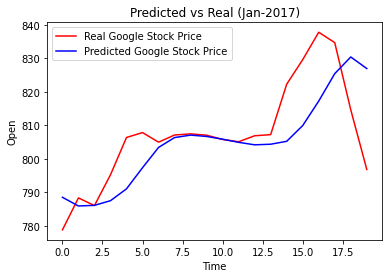

In [ ]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Predicted vs Real (Jan-2017)')
plt.xlabel('Time')
plt.ylabel('Open')
plt.legend()
plt.show()